<a href="https://colab.research.google.com/github/rushdadiba-sinwan/Data-Science/blob/main/HealthyExpectancy_(HALE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

The dataset that I'm using estimates the global Healthy Life Expectancy (HALE) at birth and at age 60. This dataset is downloaded from World Health Organization's Global Health Observatory (WHO GHO) under the theme of "Life Expectancy and Healthy Life Expectancy".

The indicator used in this dataset, HALE, is an indicator to measure how many years long do people live in good health across the world, also differentiated by sex to dive deeper if there is a trend can be observed by comparing males and females.

Indicators in the data:
- Types of Healthy Life Expectancy
- Countries
- Regions
- Sex
- HALE Value (years)

# PROBLEM STATEMENT

1. Is there any pattern over time in HALE across the globe, and in Malaysia?

2. Is the trend for females and males different globally?

3. What insights can we gain from both early-life and later-life health outcomes to better shape the health policies?

# RESULTS
Here, in this section I'm going through step-by-step from the uploading of the raw data to data preprocessing to finally analyze and gaining insights.

## Data Pre-processing

In [ ]:
#Loading all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Uploading .csv raw dataset

data = pd.read_csv('raw_data.csv')
data

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,42.23,NaN,44.08,43.1 [42.2 – 44.1],NaN,NaN,EN,2024-08-01T16:00:00.000Z
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,42.74,NaN,44.97,43.8 [42.7 – 45.0],NaN,NaN,EN,2024-08-01T16:00:00.000Z
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,2021,...,NaN,NaN,43.66,NaN,45.76,44.6 [43.7 – 45.8],NaN,NaN,EN,2024-08-01T16:00:00.000Z
3,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,44.26,NaN,46.48,45.4 [44.3 – 46.5],NaN,NaN,EN,2024-08-01T16:00:00.000Z
4,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,SWZ,Eswatini,Year,2021,...,NaN,NaN,44.85,NaN,46.98,45.8 [44.8 – 47.0],NaN,NaN,EN,2024-08-01T16:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),text,AFR,Africa,Country,COD,Democratic Republic of the Congo,Year,2000,...,NaN,NaN,9.33,NaN,10.38,9.8 [9.3-10.4],NaN,NaN,EN,2024-08-01T16:00:00.000Z
24416,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),text,EUR,Europe,Country,UZB,Uzbekistan,Year,2000,...,NaN,NaN,9.42,NaN,10.17,9.8 [9.4-10.2],NaN,NaN,EN,2024-08-01T16:00:00.000Z
24417,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),text,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2000,...,NaN,NaN,9.25,NaN,10.58,9.9 [9.2-10.6],NaN,NaN,EN,2024-08-01T16:00:00.000Z
24418,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),text,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2000,...,NaN,NaN,9.42,NaN,10.32,9.9 [9.4-10.3],NaN,NaN,EN,2024-08-01T16:00:00.000Z


In [ ]:
# Choosing 'Year' to be my index
data.set_index('Period', inplace=True)
data

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,IsLatestYear,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
Period,,,,,,,,,,,,,,,,,,,,,
2021,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,True,...,NaN,NaN,42.23,NaN,44.08,43.1 [42.2 – 44.1],NaN,NaN,EN,2024-08-01T16:00:00.000Z
2021,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,True,...,NaN,NaN,42.74,NaN,44.97,43.8 [42.7 – 45.0],NaN,NaN,EN,2024-08-01T16:00:00.000Z
2021,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,LSO,Lesotho,Year,True,...,NaN,NaN,43.66,NaN,45.76,44.6 [43.7 – 45.8],NaN,NaN,EN,2024-08-01T16:00:00.000Z
2021,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,CAF,Central African Republic,Year,True,...,NaN,NaN,44.26,NaN,46.48,45.4 [44.3 – 46.5],NaN,NaN,EN,2024-08-01T16:00:00.000Z
2021,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),text,AFR,Africa,Country,SWZ,Eswatini,Year,True,...,NaN,NaN,44.85,NaN,46.98,45.8 [44.8 – 47.0],NaN,NaN,EN,2024-08-01T16:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),text,AFR,Africa,Country,COD,Democratic Republic of the Congo,Year,False,...,NaN,NaN,9.33,NaN,10.38,9.8 [9.3-10.4],NaN,NaN,EN,2024-08-01T16:00:00.000Z
2000,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),text,EUR,Europe,Country,UZB,Uzbekistan,Year,False,...,NaN,NaN,9.42,NaN,10.17,9.8 [9.4-10.2],NaN,NaN,EN,2024-08-01T16:00:00.000Z
2000,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),text,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,False,...,NaN,NaN,9.25,NaN,10.58,9.9 [9.2-10.6],NaN,NaN,EN,2024-08-01T16:00:00.000Z


In [ ]:
#Selecting few columns from 'data' - first i need to know the columns
for i, col in enumerate(data.columns):
  print(i, col)

0 IndicatorCode
1 Indicator
2 ValueType
3 ParentLocationCode
4 ParentLocation
5 Location type
6 SpatialDimValueCode
7 Location
8 Period type
9 IsLatestYear
10 Dim1 type
11 Dim1
12 Dim1ValueCode
13 Dim2 type
14 Dim2
15 Dim2ValueCode
16 Dim3 type
17 Dim3
18 Dim3ValueCode
19 DataSourceDimValueCode
20 DataSource
21 FactValueNumericPrefix
22 FactValueNumeric
23 FactValueUoM
24 FactValueNumericLowPrefix
25 FactValueNumericLow
26 FactValueNumericHighPrefix
27 FactValueNumericHigh
28 Value
29 FactValueTranslationID
30 FactComments
31 Language
32 DateModified


In [ ]:
# Choosing only (HALE Type), (Year), (Sex) and (HALE Value) for the dataframe
# Renaming all the chosen columns as another name

df = data[[data.columns[1], data.columns[7], data.columns[11],
           data.columns[22]]].rename(
               columns={
                   data.columns[1]:'HALE Indicator/Type',
                   data.columns[7]:'Country',
                   data.columns[11]:'Sex',
                   data.columns[22]:'HALE Value'
               }
           )

In [ ]:
# Renaming 'Period' as Year

df = df.rename_axis('Year')
df

,HALE Indicator/Type,Country,Sex,HALE Value
Year,,,,
2021,Healthy life expectancy (HALE) at birth (years),Lesotho,Male,43.10
2021,Healthy life expectancy (HALE) at birth (years),Central African Republic,Male,43.78
2021,Healthy life expectancy (HALE) at birth (years),Lesotho,Both sexes,44.63
2021,Healthy life expectancy (HALE) at birth (years),Central African Republic,Both sexes,45.43
2021,Healthy life expectancy (HALE) at birth (years),Eswatini,Male,45.79
...,...,...,...,...
2000,Healthy life expectancy (HALE) at age 60 (years),Democratic Republic of the Congo,Male,9.83
2000,Healthy life expectancy (HALE) at age 60 (years),Uzbekistan,Male,9.80
2000,Healthy life expectancy (HALE) at age 60 (years),Afghanistan,Both sexes,9.86


In [ ]:
df['HALE Indicator/Type']

,HALE Indicator/Type
Year,
2021,Healthy life expectancy (HALE) at birth (years)
2021,Healthy life expectancy (HALE) at birth (years)
2021,Healthy life expectancy (HALE) at birth (years)
2021,Healthy life expectancy (HALE) at birth (years)
2021,Healthy life expectancy (HALE) at birth (years)
...,...
2000,Healthy life expectancy (HALE) at age 60 (years)
2000,Healthy life expectancy (HALE) at age 60 (years)
2000,Healthy life expectancy (HALE) at age 60 (years)


## **1 - Analysis : HALE at birth vs HALE at age 60**

For the first analysis, I want to know the difference of HALE at birth and HALE at the age of 60 over the time.
The HALE value will be calculated and taken as average.

In [ ]:
# Group by x-axis=Year, y-axis=HALE Value
# Line 1 = HALE at birth, Line 2 = HALE at age 60

analysis_1 = df.groupby(['Year', 'HALE Indicator/Type'])['HALE Value'].mean().unstack()

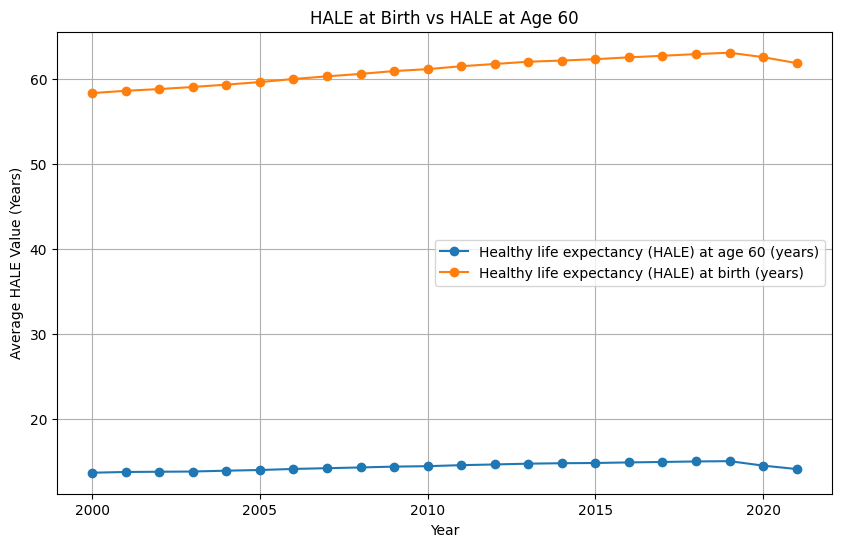

In [ ]:
# Plotting the line graph of HALE at birth vs HALE at age 60

plt.figure(figsize=(10, 6))
for column in analysis_1.columns:
    plt.plot(analysis_1.index, analysis_1[column], marker='o', label=column)
plt.xlabel('Year')
plt.ylabel('Average HALE Value (Years)')
plt.title('HALE at Birth vs HALE at Age 60')
plt.legend()
plt.grid(True)
plt.show()


Since the HALE value for indicator 'at age 60' is actually **60+x**, I wanted to standardize the value as to compare if the values differs much from HALE at birth.

In [ ]:
df.loc[df['HALE Indicator/Type']=="Healthy life expectancy (HALE) at age 60 (years)",
       "HALE Value"] += 60

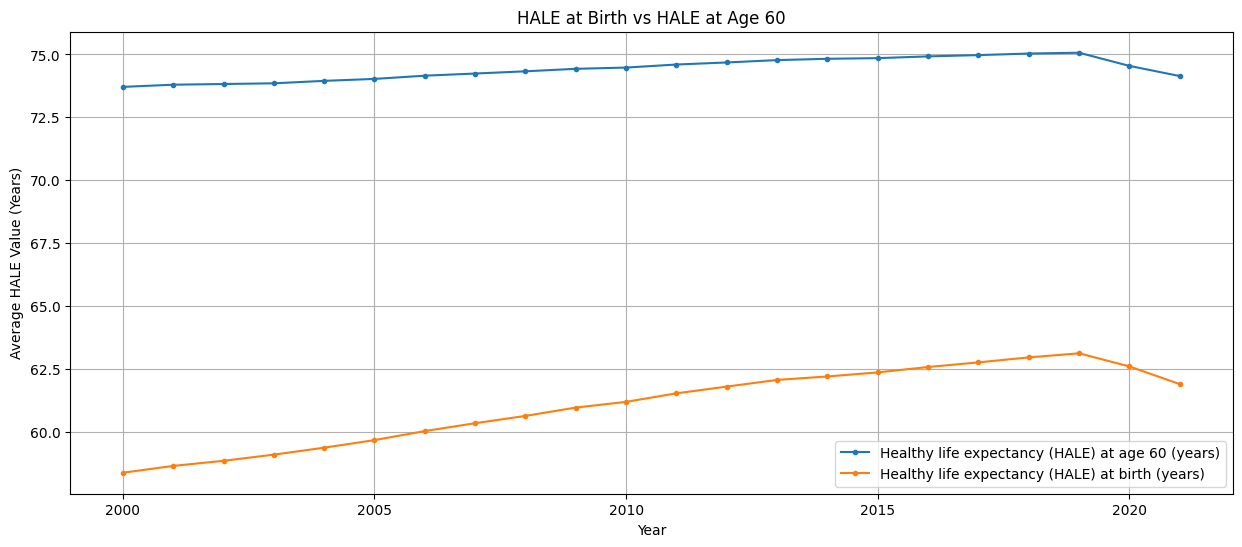

In [ ]:
# Re-code
analysis_1 = df.groupby(['Year', 'HALE Indicator/Type'])['HALE Value'].mean().unstack()

# Replot
plt.figure(figsize=(15, 6))
for column in analysis_1.columns:
    plt.plot(analysis_1.index, analysis_1[column], marker='.', label=column)
plt.xlabel('Year')
plt.ylabel('Average HALE Value (Years)')
plt.title('HALE at Birth vs HALE at Age 60')
plt.legend()
plt.grid(True)
plt.show()

### DISCUSSION:

- So from the above line plot, we can see the disparity between the HALE values at birth and HALE values at age of 60.

- On the same year, babies who are born are expected to live healthily below the age of 65. While those ageing populations who have achieved the age of 60 are expected to live healthily until around 73 years old.

- This suggests that current generation has a less of healthy lifestyle compared to the old generation.

## 2 - Analysis : Sex Differences in HALE Values

### 2-1 HALE at Birth

In [ ]:
# Filtering Sex to only include Male and Female AND HALE Value at Birth

analysis_21 = df[
    df['Sex'].isin(['Male', 'Female'])&
    df['HALE Indicator/Type'].isin(['Healthy life expectancy (HALE) at birth (years)'])
    ]

Text(13.819444444444452, 0.5, 'HALE Value at Birth (Years)')

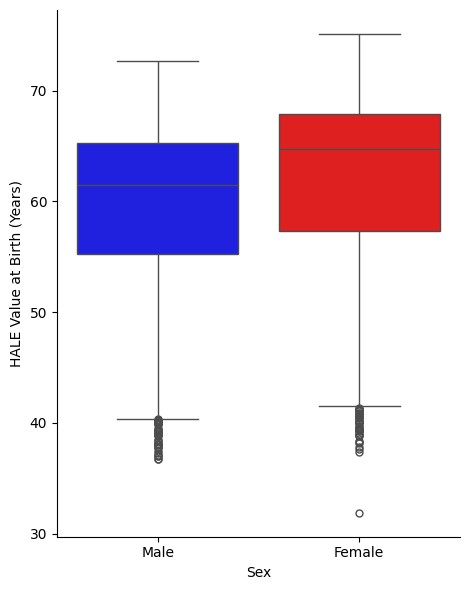

In [ ]:
# Plotting the boxplot of HALE Values at Birth
##noteForMe: aspect =1 will be square, greater than 1 will be wider, less than 1 will be taller

sns.catplot(data=analysis_21, kind='box', height=6, aspect=0.8,
            x='Sex', y='HALE Value', hue='Sex',order=['Male', 'Female'],
            palette={'Male': 'blue', 'Female': 'red'});

plt.ylabel('HALE Value at Birth (Years)')

### 2-2 HALE at Age 60

In [ ]:
analysis_22 = df[
    df['Sex'].isin(['Male', 'Female']) &
    df['HALE Indicator/Type'].isin(['Healthy life expectancy (HALE) at age 60 (years)'])
]

Text(13.694444444444452, 0.5, 'HALE Value at Age 60 (Years)')

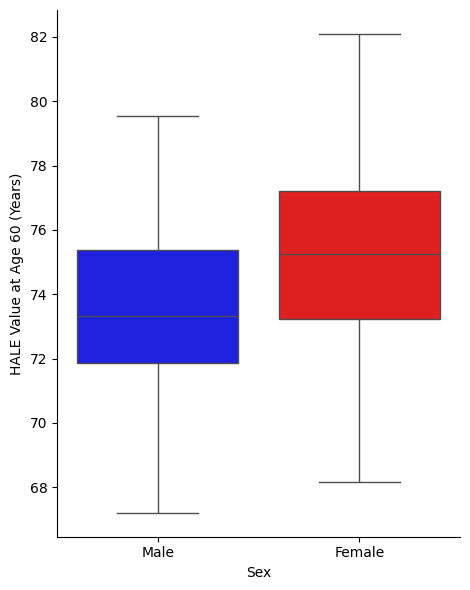

In [ ]:
sns.catplot(data=analysis_22, kind='box', height=6, aspect=0.8,
            x='Sex', y='HALE Value', hue='Sex', order=['Male', 'Female'],
            palette={'Male': 'blue', 'Female': 'red'});

plt.ylabel('HALE Value at Age 60 (Years)')

### DISCUSSION:

In [ ]:
# Combining both dataframes of HALE at Birth and HALE at Age 60, to view it side-by-side
analysis_2 = pd.concat([analysis_21, analysis_22])

Text(0.5, 0.98, 'HALE Values at Birth and Age 60')

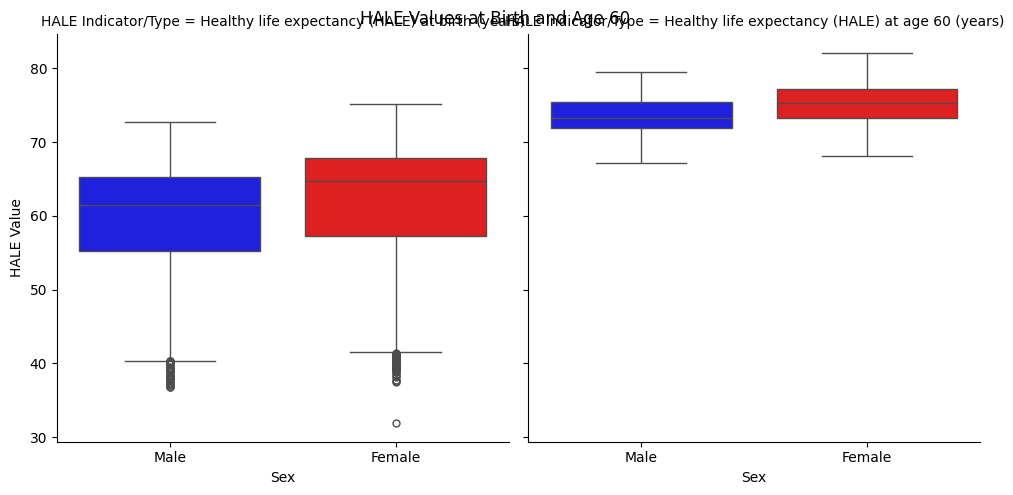

In [ ]:
# Plotting the Dataframes side-by-side
sns.catplot(x='Sex', y='HALE Value', col='HALE Indicator/Type',
            hue='Sex', kind='box', data=analysis_2,
            palette={'Male': 'blue', 'Female': 'red'})
plt.suptitle('HALE Values at Birth and Age 60')

From the boxplots obtained, we can conclude that comparatively, being females increased the expectancy of being healthy both at birth and at the age of 60. This may suggest that females around the world are practicing healthy lifestyle (*and possibly less dangerous*) compared to the males.

Furthermore, from scientific point of view, genetically this can be caused due to biological factors like;
- Sex Hormones: endrogens and estrogens
- Sex Chromosomes: {Gavrilov et al. 1995) stated that longevity genes are located in X chromosome
- Epigenetics: Women tend to have different DNA methylation patterns

## 3 - Analysis : Malaysia vs Global

### 3-1 HALE at Birth

In [ ]:
malaysia_birth = df[
    df['Country'].isin(['Malaysia'])&
    df['HALE Indicator/Type'].isin(['Healthy life expectancy (HALE) at birth (years)'])
    ]

global_birth = df[
    df['HALE Indicator/Type'].isin(['Healthy life expectancy (HALE) at birth (years)'])
]
# Rename all countries in global_birth to 'Global'
global_birth['Country'] = 'Global'

birth_hale = pd.concat([malaysia_birth, global_birth])

/tmp/ipython-input-205602630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_birth['Country'] = 'Global'


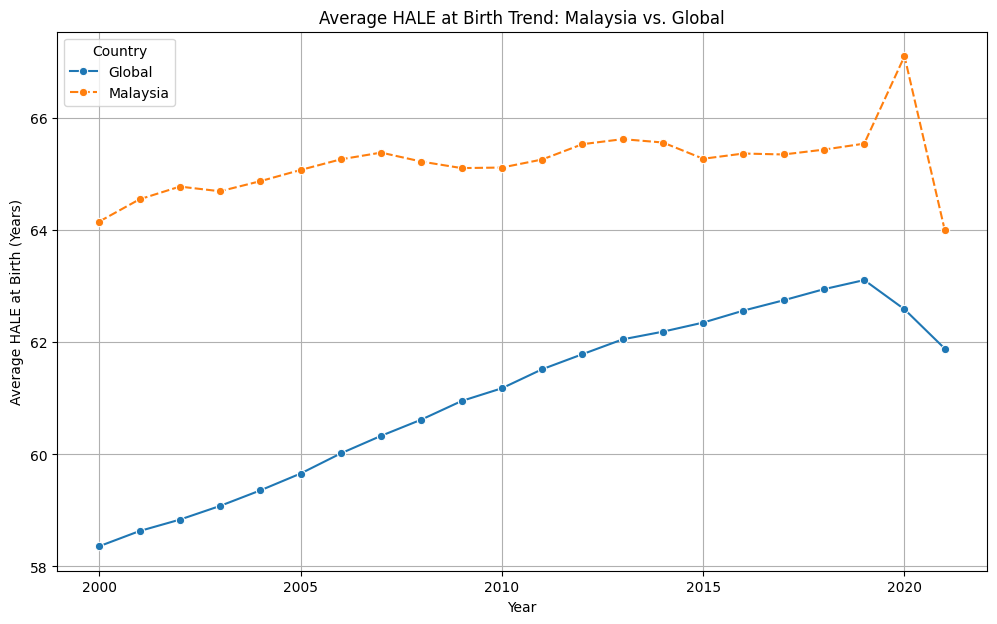

In [ ]:
# Group the combined birth_hale data (Malaysia vs Global)
analysis_31 = birth_hale.groupby([birth_hale.index, 'Country'])['HALE Value'].mean().unstack()

# Plotting the line graph
plt.figure(figsize=(12, 7))
sns.lineplot(data=analysis_31, marker='o')
plt.xlabel('Year')
plt.ylabel('Average HALE at Birth (Years)')
plt.title('Average HALE at Birth Trend: Malaysia vs. Global')
plt.grid(True)
plt.legend(title='Country')

- From the lineplot above, we can see that Malaysia has higher average of life expectancy at birth compared to world-wide average values. This shows that Malaysia's healthcare policies cater to younger generation much more.

- The Global Line increasing throughout the year up to year 2019, then declining. 2019 is the year of the pandemic COVID-19 where as expected, the health expectancy falling.

- However, for Malaysia Line there is a possibility that the data is poorly recorded since the health expectancy suddenly experience a sharp spike after the pandemic, during the year 2020.

### 3-2 HALE at Age 60

In [ ]:
malaysia_60 = df[
    df['Country'].isin(['Malaysia'])&
    df['HALE Indicator/Type'].isin(['Healthy life expectancy (HALE) at age 60 (years)'])
    ]

global_60 = df[
    df['HALE Indicator/Type'].isin(['Healthy life expectancy (HALE) at age 60 (years)'])
]

# Rename all countries in global_60 to 'Global'
global_60['Country'] = 'Global'

sixty_hale = pd.concat([malaysia_60, global_60])

/tmp/ipython-input-3450584363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_60['Country'] = 'Global'


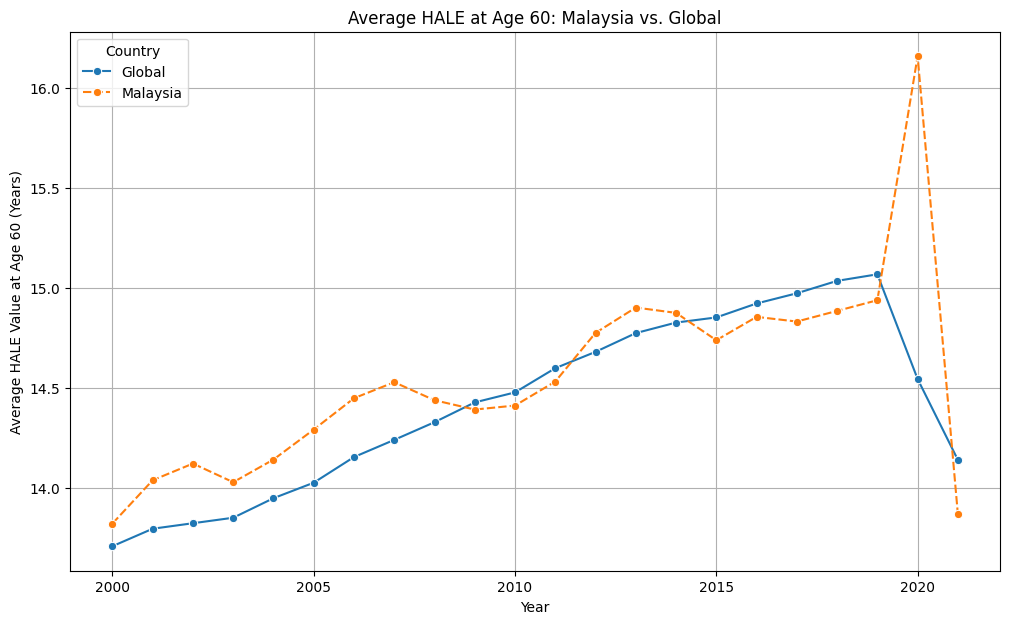

In [ ]:
# Group the combined birth_hale data (Malaysia vs Global)
analysis_32 = sixty_hale.groupby([sixty_hale.index, 'Country'])['HALE Value'].mean().unstack()

# Plotting the line graph
plt.figure(figsize=(12, 7))
sns.lineplot(data=analysis_32, marker='o')
plt.xlabel('Year')
plt.ylabel('Average HALE Value at Age 60 (Years)')
plt.title('Average HALE at Age 60: Malaysia vs. Global')
plt.grid(True)
plt.legend(title='Country')

- The line graph shows that the trend of HALE is steadily increasing over time for both globally and in Malaysia.
- However, as clarified in the analysis for Malaysia's HALE at birth (*above*), there is a possibility where the data experienced reporting gaps where suddenly the HALE value is spiking after the pandemic which is unlikely.
- Comparatively, this third analysis clearly shows that Malaysia healthcare is currently lacking in supporting the needs of ageing population.

## 4- Analysis : Regional Insights

Since I was not extracting the Region column, I need to extract again from the raw data, [data] as another dataframe named dframe.

In [ ]:
dframe = data[[data.columns[1], data.columns[4], data.columns[7], data.columns[11],
           data.columns[22]]].rename(
               columns={
                   data.columns[1]:'HALE Type',
                   data.columns[4]:'Region',
                   data.columns[7]:'Country',
                   data.columns[11]:'Sex',
                   data.columns[22]:'HALE Value'
               }
           )

dframe.loc[dframe['HALE Type']=="Healthy life expectancy (HALE) at age 60 (years)",
       "HALE Value"] += 60

dframe

,HALE Type,Region,Country,Sex,HALE Value
Period,,,,,
2021,Healthy life expectancy (HALE) at birth (years),Africa,Lesotho,Male,43.10
2021,Healthy life expectancy (HALE) at birth (years),Africa,Central African Republic,Male,43.78
2021,Healthy life expectancy (HALE) at birth (years),Africa,Lesotho,Both sexes,44.63
2021,Healthy life expectancy (HALE) at birth (years),Africa,Central African Republic,Both sexes,45.43
2021,Healthy life expectancy (HALE) at birth (years),Africa,Eswatini,Male,45.79
...,...,...,...,...,...
2000,Healthy life expectancy (HALE) at age 60 (years),Africa,Democratic Republic of the Congo,Male,69.83
2000,Healthy life expectancy (HALE) at age 60 (years),Europe,Uzbekistan,Male,69.80
2000,Healthy life expectancy (HALE) at age 60 (years),Eastern Mediterranean,Afghanistan,Both sexes,69.86


In [ ]:
# Getting the unique values from the 'Region' column
regions = dframe['Region'].unique()

# Printing the list of the Regions
for i, region in enumerate(regions):
  print(i+1, region)

1 Africa
2 Eastern Mediterranean
3 Western Pacific
4 Americas
5 South-East Asia
6 Europe


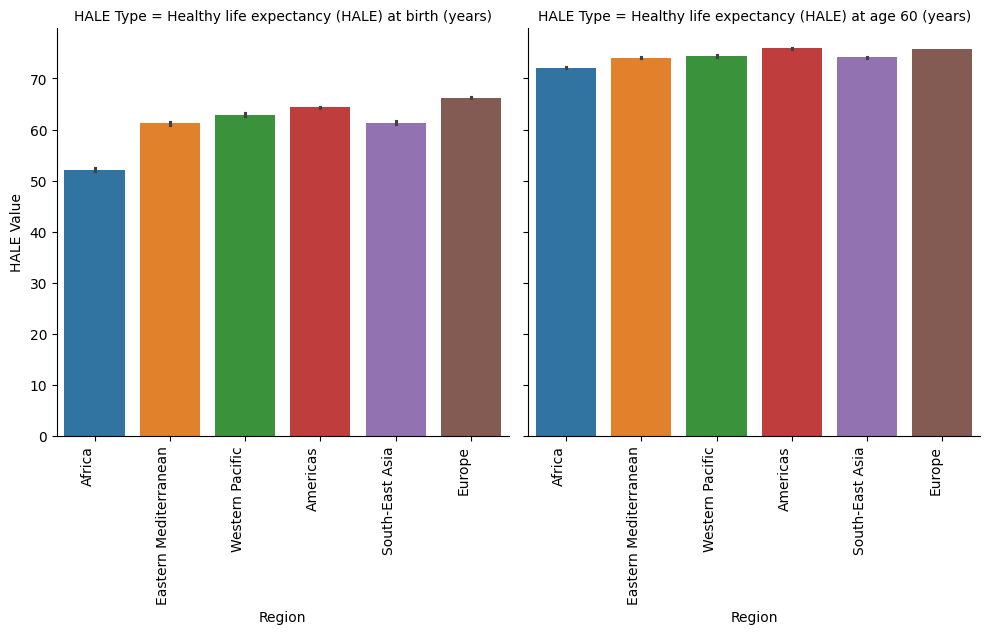

In [ ]:
g = sns.catplot(x='Region', y='HALE Value',
                col='HALE Type', hue='Region',
                kind='bar', data=dframe);

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90, ha="right")

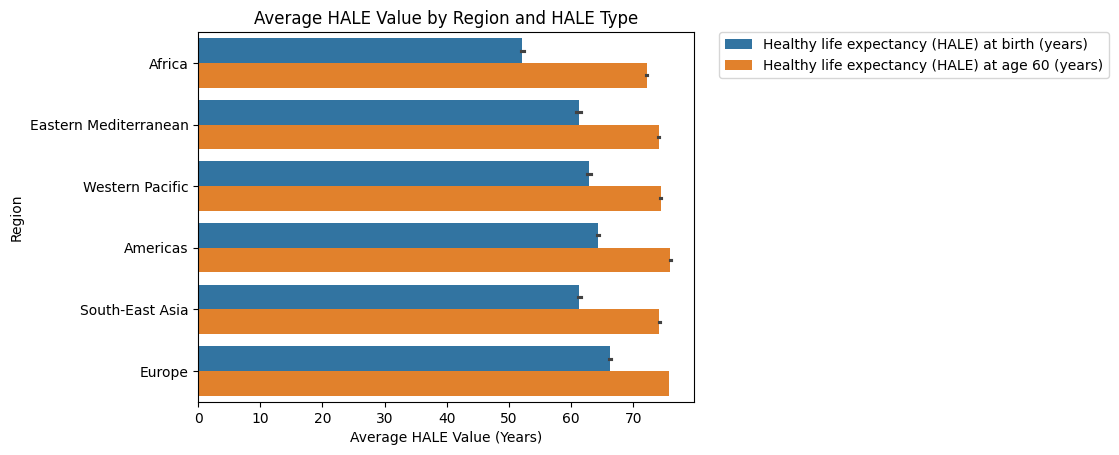

In [ ]:
# Plotting the dframe by region and HALE Type
sns.barplot(x='HALE Value', y='Region', hue='HALE Type', data=dframe)
plt.title('Average HALE Value by Region and HALE Type')
plt.xlabel('Average HALE Value (Years)')
plt.ylabel('Region')

# Moving the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### DISCUSSION:

- For both barplots are actually presenting the same output. Only that the first one are separated by HALE Type and the second one, the HALE type are constructed side-by-side.
- For HALE at 60, we can see there is not much difference for the expectancy of life, meaning all over the world the expectancy of healthy life for the ageing population is steady across the regions.
- However, for the healthy life expectancy at birth, we can see quite stark difference since the highest are coming from Europe and the lowest one would be from Africa Region where the expectancy of their healthy life are below 60 years old.

To be fair, we should also know the number of entries to know the distribution of data. The barplot below visualizes the number of data collected from these regions.

Text(0, 0.5, 'Region')

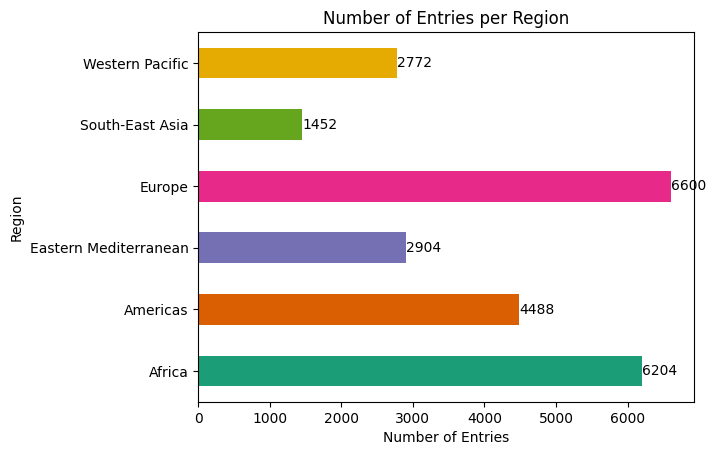

In [ ]:
# Group by Region and count the size of each group
region_counts = dframe.groupby('Region').size()

# Create the horizontal bar plot
ax = region_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Add the number of counts on each bar
for i, count in enumerate(region_counts):
    ax.text(count, i, str(count), va='center')
plt.title('Number of Entries per Region')
plt.xlabel('Number of Entries')
plt.ylabel('Region')

- Based on the distribution visualization above, Europe has the highest data collection throughout all the other regions, following by Africa. This suggest that HALE at Birth of Africa to be accurately plotted.

- Africa, as a region is having health challenges which contributed by several factors like Climate Change that is also affecting the sanitation and hygiene as well as unhealthy diets among the younger generation. It is like a dominoes, as the factors also indirectly create africans to have infectious disease.

### Additional Plot

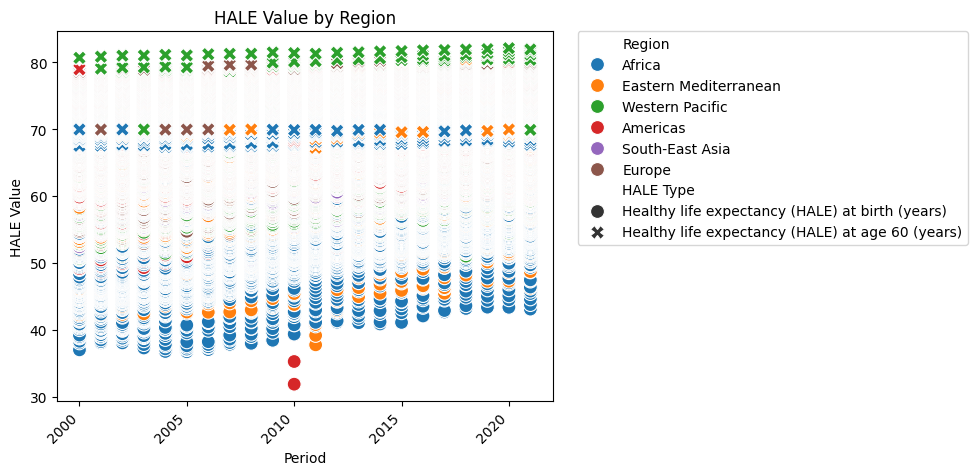

In [ ]:
# Create a scatter plot
sns.scatterplot(data=dframe, x='Period', y='HALE Value', hue='Region', style='HALE Type', s=100)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('HALE Value by Region')

# Moving the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From this scatter plot, the healthiest life of ageing population is located at Western Pacific, as throughout the time, the expectancy of healthy life (*no severe physical and dementia*) is around ~80 years old.

# CONCLUSION

## Disparity between HALE at Birth and HALE at Age 60

1. The analysis shows a stark difference between the average healthy life expectancy at birth and the healthy life expectancy at age 60. This suggests that people who reach age of 60 tend to live more significant number of quality, healthy years.
2. Further investigation is needed to support the initial observation or inceptive hypothesis about the younger generation having less-healthy lifestyles compared to the older generation.

## Sex Differences in HALE

1. Consistently for both HALE at Birth and HALE at Age 60, females tend to have more healthy life ahead compared to males. The data shows a global pattern where biological and lifestyle factors both contribute to females living healthy lives throughout the time.

## Malaysia vs. Global Trends

1. Conclusively, Malaysia is known to have one of the best healthcare in the world which reflected in this dataset where Malaysia has the higher average HALE at birth than the Global average.
2. However, the sharp spike as clarified above is probably due to the reporting gaps that indicate data recording anomalies rather than true sudden increase in health expectancy.

## Regional Comparison

1. There are stark differences in HALE at birth across the Regions, with some regions like Europe and Western Pacific showing higher values than others like Africa and other regions.
2. This shows how there are inequalities in healthcare access, or lifestyle factors across the parts of the worls that affecting early-life health outcomes.
3. The geographical variables also should be considered in one of the factors that challenge a healthy life.

## Data Distribution

The varying number of entries per region is one of the important context for the regional analysis, suggesting that the averages for regions with fewer data collections might be less representative or less stable.